# Final Project: PanClassif

Import libraries

In [1]:
# import panclassif as pc
import pandas as pd
import numpy as np
from panclassif import dataProcess, featSelect, upsampled, binary_merge, multi_merge, classification
from sklearn.ensemble import RandomForestClassifier

## Baseline model

#### Rare cancers

Cancer files: ['SARC.csv.gz', 'PCPG.csv.gz', 'THYM.csv.gz', 'KICH.csv.gz', 'CHOL.csv.gz']
Normal files: ['PCPG.norm.csv.gz', 'THYM.norm.csv.gz', 'CHOL.norm.csv.gz', 'KICH.norm.csv.gz', 'SARC.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for CHOL
Processing file index: 1
Doing feature selection for KICH
Processing file index: 2
Doing feature selection for PCPG
Processing file index: 3
Doing feature selection for SARC
Processing file index: 4
Doing feature selection for THYM
Feature selection process has ended

Data process is running
Unique genes: 25
CHOL
(45, 25)
(9, 25)
KICH
(91, 25)
(25, 25)
PCPG
(187, 25)
(3, 25)
SARC
(265, 25)
(2, 25)
THYM
(122, 25)
(2, 25)
Data process has ended

Upsampling on train data is running
Upsampling on train data has ended

Merging for binary has started
Merging for binary has ended

Merging for multiclass has started
Merging for multiclass has ended



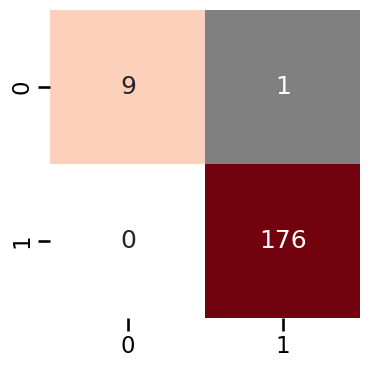

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       176

    accuracy                           0.99       186
   macro avg       1.00      0.95      0.97       186
weighted avg       0.99      0.99      0.99       186

MCC Score:  0.9459996058335797


<Figure size 640x480 with 0 Axes>

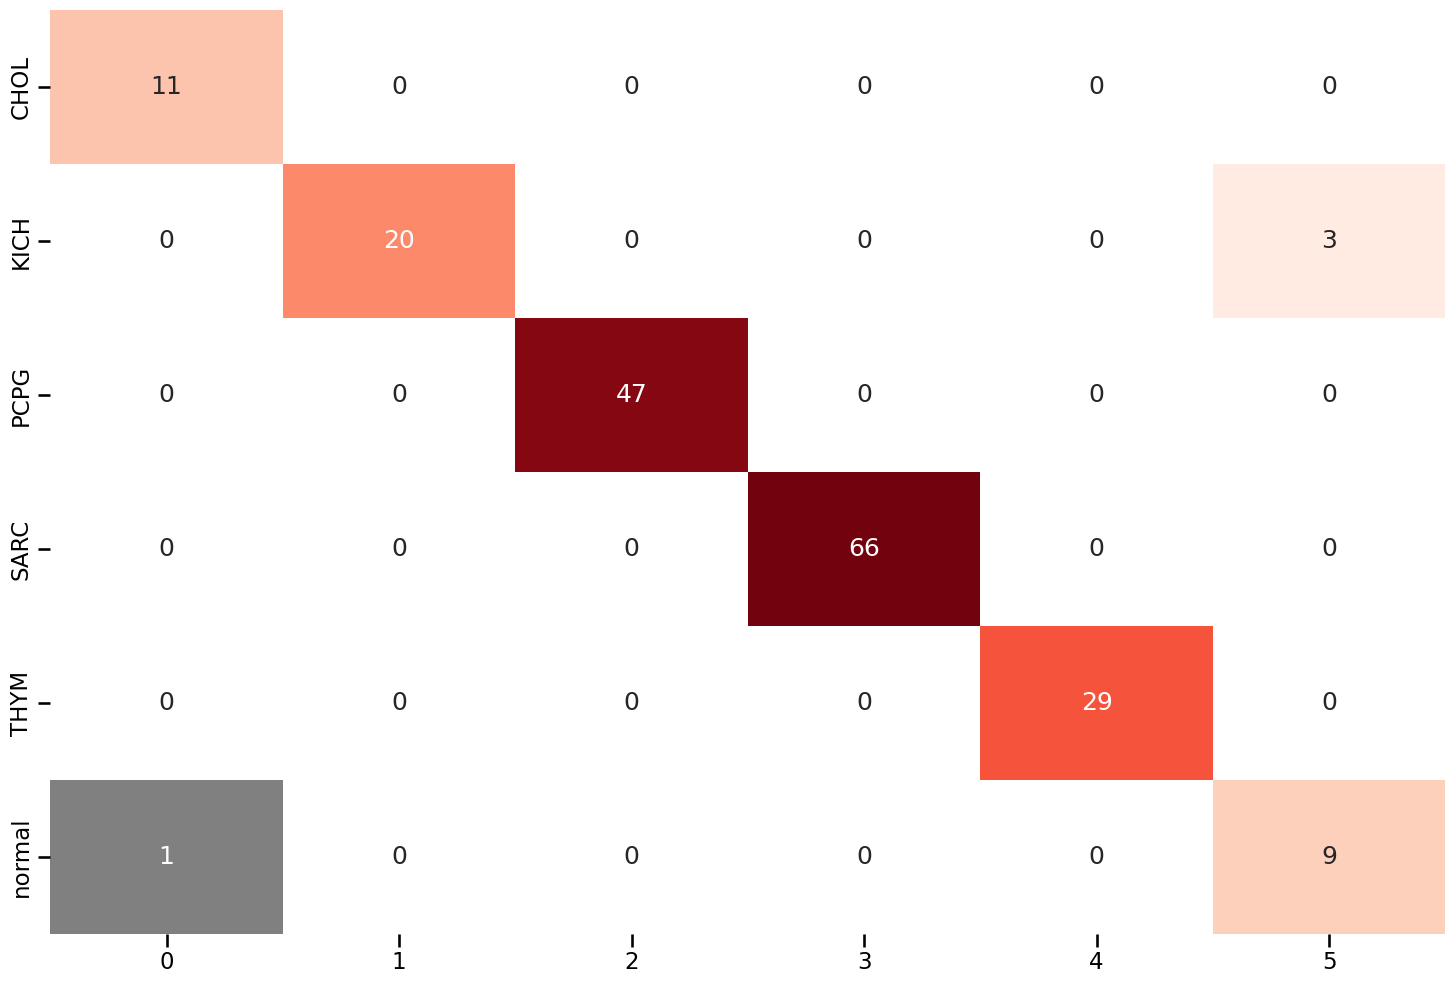

              precision    recall  f1-score   support

        CHOL       0.92      1.00      0.96        11
        KICH       1.00      0.87      0.93        23
        PCPG       1.00      1.00      1.00        47
        SARC       1.00      1.00      1.00        66
        THYM       1.00      1.00      1.00        29
      normal       0.75      0.90      0.82        10

    accuracy                           0.98       186
   macro avg       0.94      0.96      0.95       186
weighted avg       0.98      0.98      0.98       186

MCC Score:  0.9721588775103143


<Figure size 640x480 with 0 Axes>

In [98]:
homepath_rare = './rare_data'
cancerpath_rare = './rare_data/cancer'
normalpath_rare = './rare_data/normal'

# Feature selection
names_rare = featSelect(homepath_rare,cancerpath_rare,normalpath_rare, k=5)

smoothed_cancer_rare = './rare_data/cancer_smoothed'
smoothed_normal_rare = './rare_data/normal_smoothed'

# Data process
dataProcess(homepath=homepath_rare,
            names=names_rare,
            cancerpath=cancerpath_rare,
            smoothed_cancer=smoothed_cancer_rare,
            smoothed_normal=smoothed_normal_rare,
            scale_mode=0,
            cancer='CHOL')

# Upsample training data
upsampled(names_rare, homepath_rare)

# Merge data
binary_merge(names_rare, homepath_rare)
multi_merge(names_rare, homepath_rare)

# Classification
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")

#### Common cancers

Cancer files: ['BRCA.csv.gz', 'LUAD.csv.gz', 'COAD.csv.gz', 'STAD.csv.gz', 'LUSC.csv.gz', 'KIRP.csv.gz', 'PRAD.csv.gz', 'UCEC.csv.gz', 'READ.csv.gz']
Normal files: ['LUAD.norm.csv.gz', 'READ.norm.csv.gz', 'STAD.norm.csv.gz', 'UCEC.norm.csv.gz', 'COAD.norm.csv.gz', 'LUSC.norm.csv.gz', 'BRCA.norm.csv.gz', 'PRAD.norm.csv.gz', 'KIRP.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for BRCA
Processing file index: 1
Doing feature selection for COAD
Processing file index: 2
Doing feature selection for KIRP
Processing file index: 3
Doing feature selection for LUAD
Processing file index: 4
Doing feature selection for LUSC
Processing file index: 5
Doing feature selection for PRAD
Processing file index: 6
Doing feature selection for READ
Processing file index: 7
Doing feature selection for STAD
Processing file index: 8
Doing feature selection for UCEC
Feature selection process has ended

Data process is running
Unique genes: 45
BRCA
(1212, 45)

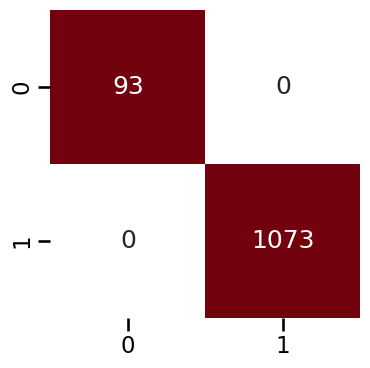

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00      1073

    accuracy                           1.00      1166
   macro avg       1.00      1.00      1.00      1166
weighted avg       1.00      1.00      1.00      1166

MCC Score:  1.0


<Figure size 640x480 with 0 Axes>

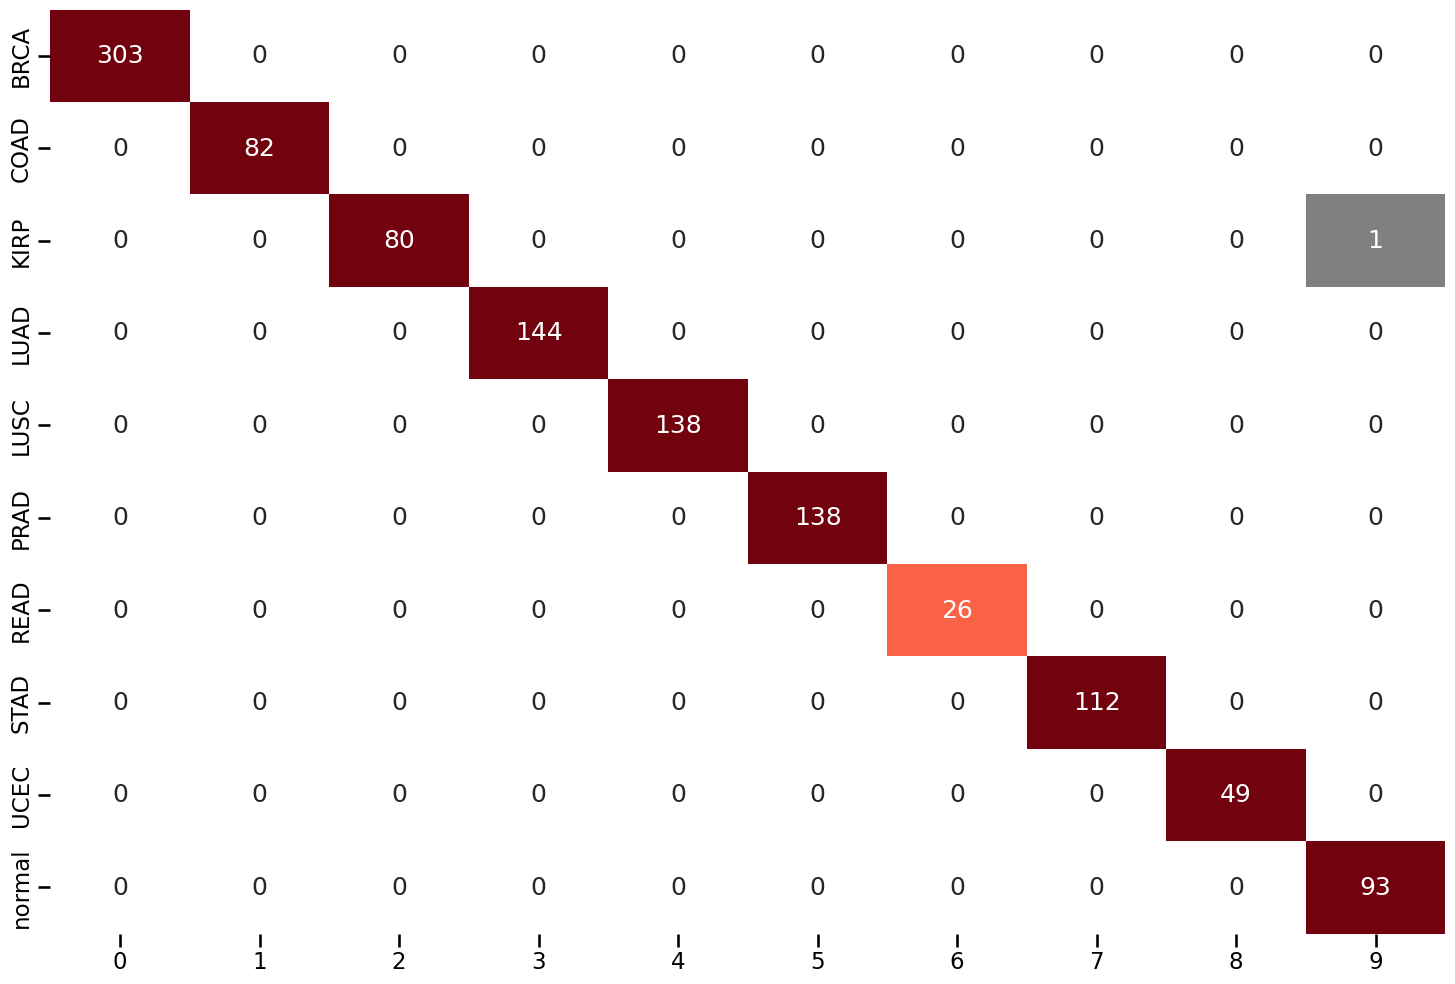

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       303
        COAD       1.00      1.00      1.00        82
        KIRP       1.00      0.99      0.99        81
        LUAD       1.00      1.00      1.00       144
        LUSC       1.00      1.00      1.00       138
        PRAD       1.00      1.00      1.00       138
        READ       1.00      1.00      1.00        26
        STAD       1.00      1.00      1.00       112
        UCEC       1.00      1.00      1.00        49
      normal       0.99      1.00      0.99        93

    accuracy                           1.00      1166
   macro avg       1.00      1.00      1.00      1166
weighted avg       1.00      1.00      1.00      1166

MCC Score:  0.9990054254022622


<Figure size 640x480 with 0 Axes>

In [99]:
homepath_common = './common_data/'
cancerpath_common = './common_data/cancer'
normalpath_common = './common_data/normal'

# Feature selection
names_common = featSelect(homepath_common,cancerpath_common,normalpath_common, k=5)

smoothed_cancer_common = './common_data/cancer_smoothed'
smoothed_normal_common = './common_data/normal_smoothed'


# Data process
dataProcess(homepath=homepath_common,
            names=names_common,
            cancerpath=cancerpath_common,
            smoothed_cancer=smoothed_cancer_common,
            smoothed_normal=smoothed_normal_common,
            scale_mode=0,
            cancer='BRCA')

# Upsample training data
upsampled(names_common, homepath_common)

# Merge data
binary_merge(names_common, homepath_common)
multi_merge(names_common, homepath_common)

# Classification
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")

## Optuna optimization of rare cancers

### 5-fold CV Binary training

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, balanced_accuracy_score, f1_score, fbeta_score, recall_score, precision_score, average_precision_score, confusion_matrix
import optuna
from optuna_integration import vis
from tqdm import tqdm

#train data load
Cancer = pd.read_csv(homepath_rare+"/train_data/bin_Cancer.txt.bz2",header=None, delimiter = "\t")
Normal = pd.read_csv(homepath_rare+"/train_data/bin_Normal.txt.bz2",header=None, delimiter = "\t")
Cancer['Target'] = 1
Normal['Target'] = 0
#Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
X = Data.iloc[:,:len(Data.columns)-1].values
y = Data.iloc[:,len(Data.columns)-1].values

# Initialize dictionaries and lists to store scores and hyperparameters
cv_scores_bin_rare = {'accuracy': [], 'mcc': [], 'balanced_accuracy': [], 'f1_score': [], 'f2_score': [],
             'recall': [], 'precision': [], 'average_precision': [], 'specificity': [], 'npv': []}
cv_params_bin_rare = []

# Generate random states for 10 rounds of CV
np.random.seed(42)
rounds = 1
seeds = [np.random.randint(1, 1000) for _ in range(rounds)]
print("Generated Seeds:", seeds)

# Define the objective function for Optuna (using MCC for binary classification)
def objective(trial, X_train, y_train, X_val, y_val):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 500, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create and fit random forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Calculate metrics
    mcc = matthews_corrcoef(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    avg_precision = average_precision_score(y_val, model.predict_proba(X_val)[:, 1])
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)

    # Return MCC for optimization (Optuna minimizes the objective)
    return -mcc  # Negative MCC because Optuna maximizes the objective function

# Perform cross-validation for each round
for round_idx in range(rounds):
    print(f"Round {round_idx + 1}")

    cv_random_state = seeds[round_idx]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=cv_random_state)

    # Initialize lists to store fold results
    fold_accuracies = []
    fold_mccs = []
    fold_balanced_accs = []
    fold_f1_scores = []
    fold_f2_scores = []
    fold_recalls = []
    fold_precisions = []
    fold_avg_precisions = []
    fold_specificities = []
    fold_npvs = []
    fold_params = []

    for fold_idx, (train_idx, val_idx) in enumerate(tqdm(cv.split(X, y), desc=f"CV Progress (Round {round_idx + 1})")):
        print(f"  Fold {fold_idx + 1}")
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Inner cross-validation
        study_bin_rare = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=cv_random_state))
        study_bin_rare.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, show_progress_bar=True)

        # Store the best trial and parameters
        best_trial = study_bin_rare.best_trial
        best_params = best_trial.params

        # Train the model with the best hyperparameters on the training data
        model = RandomForestClassifier(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            min_samples_leaf=best_params['min_samples_leaf'],
            random_state=42,
        )
        model.fit(X_train, y_train)

        # Evaluate on the validation set
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        balanced_acc = balanced_accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        f2 = fbeta_score(y_val, y_pred, beta=2)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        avg_precision = average_precision_score(y_val, model.predict_proba(X_val)[:, 1])
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)

        # Store fold results
        fold_accuracies.append(accuracy)
        fold_mccs.append(mcc)
        fold_balanced_accs.append(balanced_acc)
        fold_f1_scores.append(f1)
        fold_f2_scores.append(f2)
        fold_recalls.append(recall)
        fold_precisions.append(precision)
        fold_avg_precisions.append(avg_precision)
        fold_specificities.append(specificity)
        fold_npvs.append(npv)
        fold_params.append(best_params)

    # Calculate median scores for the round
    median_accuracy = np.median(fold_accuracies)
    median_mcc = np.median(fold_mccs)

    # Store round results
    cv_scores_bin_rare['accuracy'].append(median_accuracy)
    cv_scores_bin_rare['mcc'].append(median_mcc)
    cv_scores_bin_rare['balanced_accuracy'].append(np.median(fold_balanced_accs))
    cv_scores_bin_rare['f1_score'].append(np.median(fold_f1_scores))
    cv_scores_bin_rare['f2_score'].append(np.median(fold_f2_scores))
    cv_scores_bin_rare['recall'].append(np.median(fold_recalls))
    cv_scores_bin_rare['precision'].append(np.median(fold_precisions))
    cv_scores_bin_rare['average_precision'].append(np.median(fold_avg_precisions))
    cv_scores_bin_rare['specificity'].append(np.median(fold_specificities))
    cv_scores_bin_rare['npv'].append(np.median(fold_npvs))
    cv_params_bin_rare.append(fold_params)

# Print CV scores and parameters
print("CV Scores:", cv_scores_bin_rare)
print("CV Parameters:", cv_params_bin_rare)

Generated Seeds: [103]
Round 1


CV Progress (Round 1): 0it [00:00, ?it/s]

  Fold 1


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 1it [00:05,  5.14s/it]

  Fold 2


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 2it [00:10,  5.06s/it]

  Fold 3


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 3it [00:15,  5.32s/it]

  Fold 4


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 4it [00:23,  6.33s/it]

  Fold 5


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 5it [00:29,  5.97s/it]

CV Scores: {'accuracy': [0.9078014184397163], 'mcc': [0.7445061065785418], 'balanced_accuracy': [0.8238544474393531], 'f1_score': [0.9417040358744395], 'f2_score': [0.9704251386321626], 'recall': [0.9906542056074766], 'precision': [0.8974358974358975], 'average_precision': [0.9955197297008732], 'specificity': [0.6571428571428571], 'npv': [0.9583333333333334]}
CV Parameters: [[{'n_estimators': 25, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}, {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 3}, {'n_estimators': 22, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 7}, {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 5}, {'n_estimators': 27, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 10}]]


### 5-fold CV Multi-class training

In [91]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, balanced_accuracy_score, f1_score, fbeta_score, recall_score, precision_score, average_precision_score, confusion_matrix
import optuna
from optuna_integration import vis
from tqdm import tqdm

#train load multiclass
Cancer = pd.read_csv(homepath_rare+"/train_data/mul_Cancer.txt.bz2",header=None, delimiter = "\t")
Normal = pd.read_csv(homepath_rare+"/train_data/mul_Normal.txt.bz2",header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
# print(Data)
X_train = Data.iloc[:,:len(Data.columns)-1].values
y_train = Data.iloc[:,len(Data.columns)-1].values

# Initialize dictionaries and lists to store scores and hyperparameters
cv_scores_multi_rare = {'accuracy': [], 'mcc': [], 'balanced_accuracy': [], 'f1_score': [], 'f2_score': [],
             'recall': [], 'precision': [], 'average_precision': [], 'specificity': [], 'npv': []}
cv_params_multi_rare = []

# Generate random states for 10 rounds of CV
np.random.seed(42)
rounds = 1
seeds = [np.random.randint(1, 1000) for _ in range(rounds)]
print("Generated Seeds:", seeds)

# Define the objective function for Optuna (using MCC for binary classification)
def objective(trial, X_train, y_train, X_val, y_val):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 500, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create and fit random forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Calculate metrics
    mcc = matthews_corrcoef(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    avg_precision = average_precision_score(y_val, model.predict_proba(X_val)[:, 1])
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)

    # Return MCC for optimization (Optuna minimizes the objective)
    return -balanced_acc  # Negative MCC because Optuna maximizes the objective function

# Perform cross-validation for each round
for round_idx in range(rounds):
    print(f"Round {round_idx + 1}")

    cv_random_state = seeds[round_idx]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=cv_random_state)

    # Initialize lists to store fold results
    fold_accuracies = []
    fold_mccs = []
    fold_balanced_accs = []
    fold_f1_scores = []
    fold_f2_scores = []
    fold_recalls = []
    fold_precisions = []
    fold_avg_precisions = []
    fold_specificities = []
    fold_npvs = []
    fold_params = []

    for fold_idx, (train_idx, val_idx) in enumerate(tqdm(cv.split(X, y), desc=f"CV Progress (Round {round_idx + 1})")):
        print(f"  Fold {fold_idx + 1}")
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Inner cross-validation
        study_multi_rare = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=cv_random_state))
        study_multi_rare.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, show_progress_bar=True)

        # Store the best trial and parameters
        best_trial = study_multi_rare.best_trial
        best_params = best_trial.params

        # Train the model with the best hyperparameters on the training data
        model = RandomForestClassifier(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            min_samples_leaf=best_params['min_samples_leaf'],
            random_state=42,
        )
        model.fit(X_train, y_train)

        # Evaluate on the validation set
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        balanced_acc = balanced_accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        f2 = fbeta_score(y_val, y_pred, beta=2)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        avg_precision = average_precision_score(y_val, model.predict_proba(X_val)[:, 1])
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)

        # Store fold results
        fold_accuracies.append(accuracy)
        fold_mccs.append(mcc)
        fold_balanced_accs.append(balanced_acc)
        fold_f1_scores.append(f1)
        fold_f2_scores.append(f2)
        fold_recalls.append(recall)
        fold_precisions.append(precision)
        fold_avg_precisions.append(avg_precision)
        fold_specificities.append(specificity)
        fold_npvs.append(npv)
        fold_params.append(best_params)

    # Calculate median scores for the round
    median_accuracy = np.median(fold_accuracies)
    median_mcc = np.median(fold_mccs)

    # Store round results
    cv_scores_multi_rare['accuracy'].append(median_accuracy)
    cv_scores_multi_rare['mcc'].append(median_mcc)
    cv_scores_multi_rare['balanced_accuracy'].append(np.median(fold_balanced_accs))
    cv_scores_multi_rare['f1_score'].append(np.median(fold_f1_scores))
    cv_scores_multi_rare['f2_score'].append(np.median(fold_f2_scores))
    cv_scores_multi_rare['recall'].append(np.median(fold_recalls))
    cv_scores_multi_rare['precision'].append(np.median(fold_precisions))
    cv_scores_multi_rare['average_precision'].append(np.median(fold_avg_precisions))
    cv_scores_multi_rare['specificity'].append(np.median(fold_specificities))
    cv_scores_multi_rare['npv'].append(np.median(fold_npvs))
    cv_params_multi_rare.append(fold_params)

# Print CV scores and parameters
print("CV Scores:", cv_scores_multi_rare)
print("CV Parameters:", cv_params_multi_rare)

Generated Seeds: [103]
Round 1


CV Progress (Round 1): 0it [00:00, ?it/s]

  Fold 1


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 1it [00:05,  5.29s/it]

  Fold 2


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 2it [00:10,  5.08s/it]

  Fold 3


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 3it [00:15,  5.32s/it]

  Fold 4


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 4it [00:30,  9.07s/it]

  Fold 5


  0%|          | 0/50 [00:00<?, ?it/s]

CV Progress (Round 1): 5it [00:36,  7.40s/it]

CV Scores: {'accuracy': [0.9225352112676056], 'mcc': [0.7855292249825796], 'balanced_accuracy': [0.8524699599465955], 'f1_score': [0.9506726457399103], 'f2_score': [0.974264705882353], 'recall': [1.0], 'precision': [0.9137931034482759], 'average_precision': [0.996066093272052], 'specificity': [0.7142857142857143], 'npv': [1.0]}
CV Parameters: [[{'n_estimators': 25, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}, {'n_estimators': 16, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 10}, {'n_estimators': 22, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 7}, {'n_estimators': 319, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 5}, {'n_estimators': 42, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 9}]]


## Optuna optimization of common cancers

## Optuna Plots
(use the name of the study. Example names: study_bin_rare, study_multi_rare)

In [93]:
# Visualize optimization history
vis.plot_optimization_history(study)

In [94]:
# Visualize parameter importance
vis.plot_param_importances(study)

In [95]:
# Visualize slice plot
vis.plot_slice(study, params=["n_estimators", "max_depth"])

In [96]:
# Visualize contour plot
vis.plot_contour(study, params=["min_samples_split", "min_samples_leaf"])

In [97]:
# Visualize parallel coordinate plot
vis.plot_parallel_coordinate(study)

Multiclass tuning for rare

In [80]:
y_train.unique()

array(['THYM', 'SARC', 'PCPG', 'KICH', 'CHOL', 'normal'], dtype=object)

## Final training with validation set

### Rare data

### Common data